In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
df = pd.read_csv("Spectrum_Loc1_session1_group1_2025-04-11_16-51-13 (1).csv")

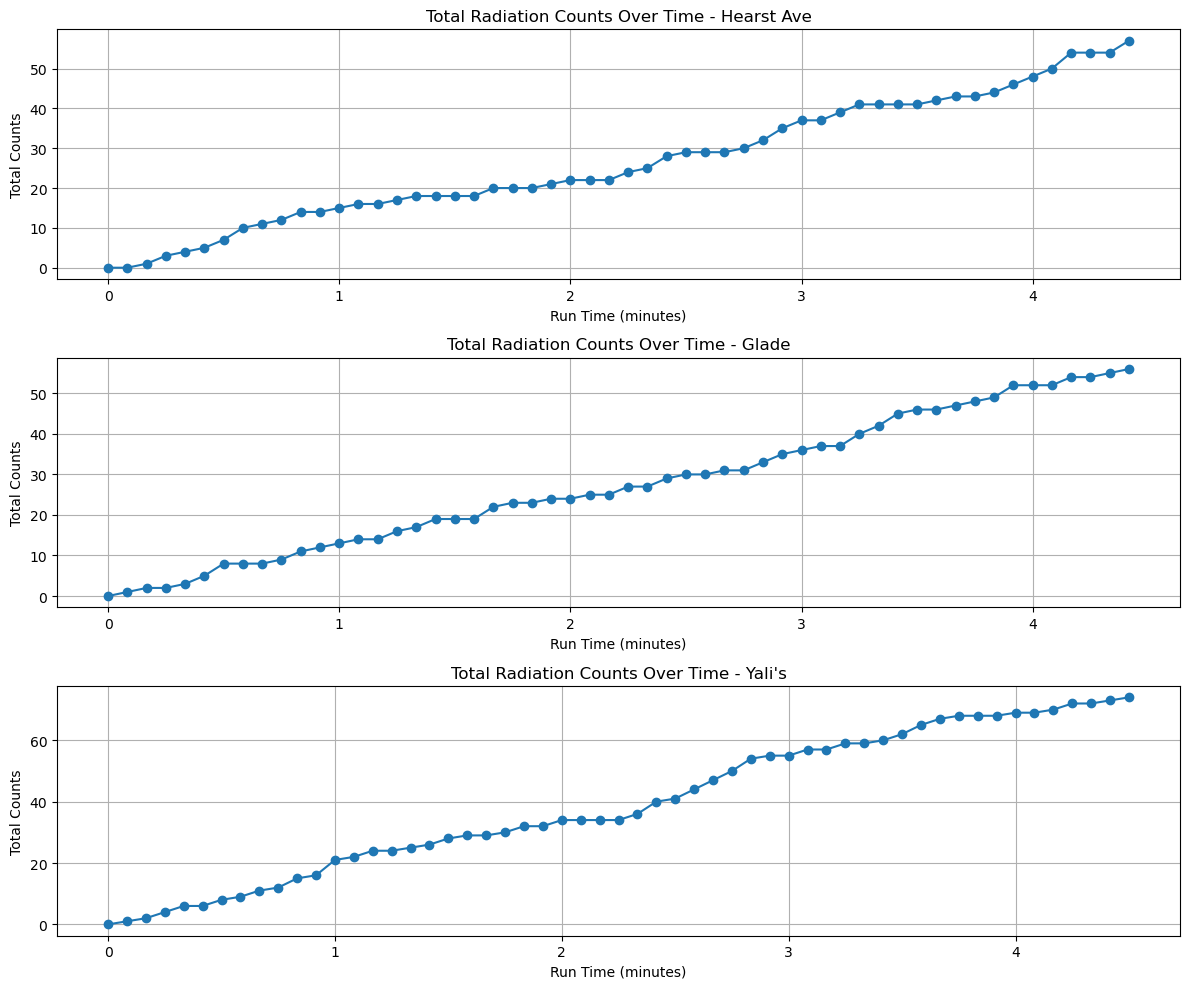

In [2]:
#A
# Couldnt get temperature and 2.5 PM concentration sensors to work so only able to do
# the radiation data. Also couldn't get location to work so had to split manually. 
df['Total_Counts'] = df['1023']

locations = {
    "Hearst Ave": df.iloc[0:54].copy(),
    "Glade": df.iloc[54:108].copy(),
    "Yali's": df.iloc[108:163].copy()}

for loc_data in locations.values():
    loc_data['Minutes'] = [i * 5 / 60 for i in range(len(loc_data))]
    loc_data['Counts'] = loc_data['Total_Counts'] - loc_data['Total_Counts'].iloc[0]

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=False)
for ax, (location, data) in zip(axes, locations.items()):
    ax.plot(data['Minutes'], data['Counts'], marker='o', linestyle='-')
    ax.set_title(f"Total Radiation Counts Over Time - {location}")
    ax.set_xlabel("Run Time (minutes)")
    ax.set_ylabel("Total Counts")
    ax.grid()

plt.tight_layout()
plt.show()

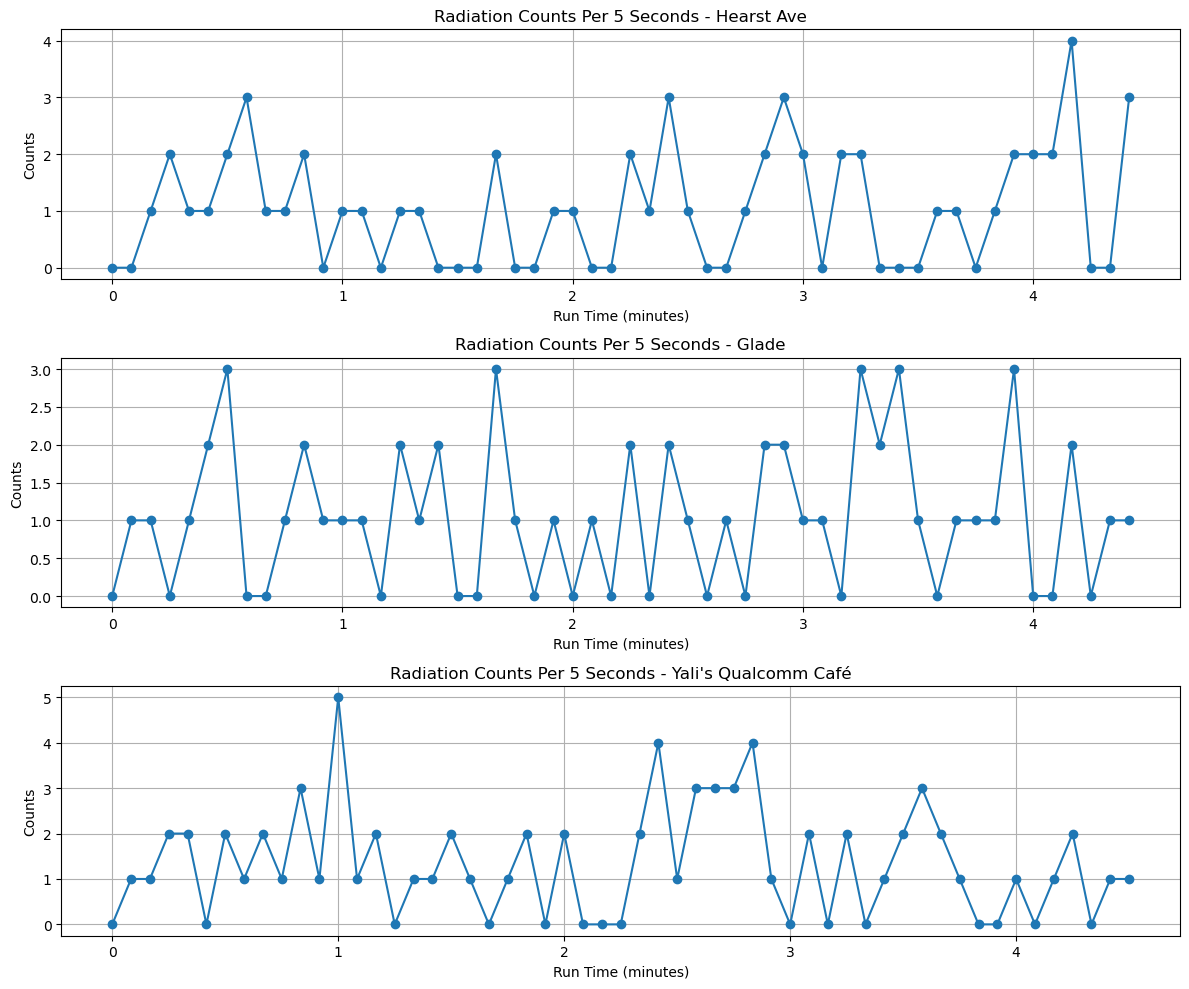

In [3]:
df['Total_Counts'] = df['1023']
locations = {
    "Hearst Ave": df.iloc[0:54].copy(),
    "Glade": df.iloc[54:108].copy(),
    "Yali's Qualcomm Café": df.iloc[108:163].copy()}

for loc_data in locations.values():
    loc_data['Minutes'] = [i * 5 / 60 for i in range(len(loc_data))] 
    loc_data['Counts_Difference'] = loc_data['Total_Counts'].diff().fillna(0)  

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=False)

for ax, (location, data) in zip(axes, locations.items()):
    ax.plot(data['Minutes'], data['Counts_Difference'], marker='o', linestyle='-')
    ax.set_title(f"Radiation Counts Per 5 Seconds - {location}")
    ax.set_xlabel("Run Time (minutes)")
    ax.set_ylabel("Counts")
    ax.grid(True)

plt.tight_layout()
plt.show()

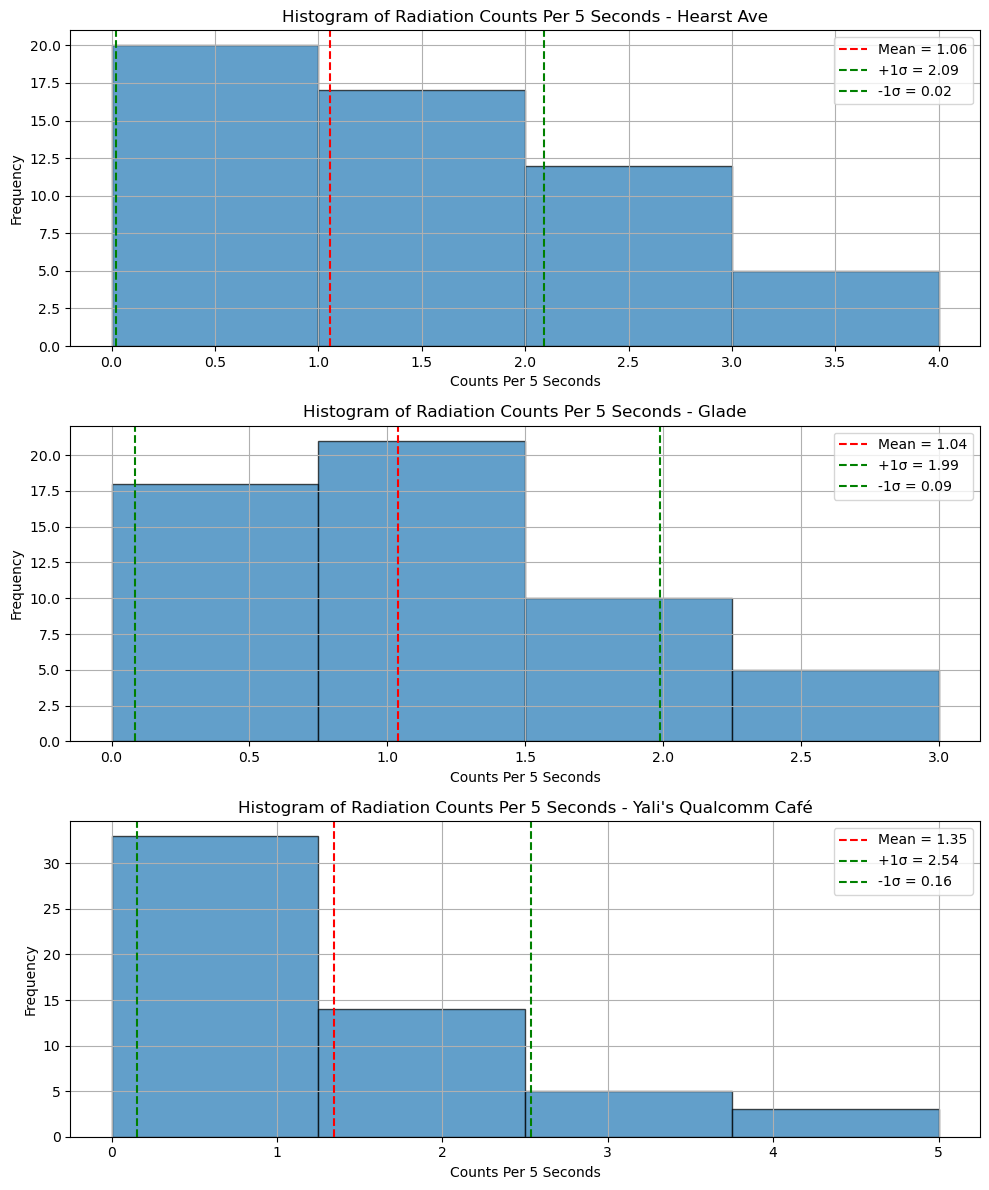

In [4]:
#B
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for ax, (location, data) in zip(axes, locations.items()):
    delta_counts = data['Counts_Difference']
    mean_delta = delta_counts.mean()
    std_delta = delta_counts.std()
    ax.hist(delta_counts, bins=4, edgecolor='black', alpha=0.7)
    ax.axvline(mean_delta, color='red', linestyle='--', label=f'Mean = {mean_delta:.2f}')
    ax.axvline(mean_delta + std_delta, color='green', linestyle='--', label=f'+1σ = {mean_delta + std_delta:.2f}')
    ax.axvline(mean_delta - std_delta, color='green', linestyle='--', label=f'-1σ = {mean_delta - std_delta:.2f}')
    ax.set_title(f"Histogram of Radiation Counts Per 5 Seconds - {location}")
    ax.set_xlabel("Counts Per 5 Seconds")
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [5]:
#C
for location, data in locations.items():
    delta_counts = data['Counts_Difference']

    mean_delta = delta_counts.mean()
    expected_std = (mean_delta)**0.5 if mean_delta > 0 else 0  # sqrt(mean), but only if positive
    measured_std = delta_counts.std()

    print(location)
    print("Mean of counts:", mean_delta)
    print("Expected σ:", expected_std)
    print("Measured σ:", measured_std)
    print()

Hearst Ave
Mean of counts: 1.0555555555555556
Expected σ: 1.0274023338281628
Measured σ: 1.0355322515620444

Glade
Mean of counts: 1.037037037037037
Expected σ: 1.0183501544346312
Measured σ: 0.9509273123216921

Yali's Qualcomm Café
Mean of counts: 1.3454545454545455
Expected σ: 1.1599373023808421
Measured σ: 1.1897429199151452



In [6]:
#D
for location, data in locations.items():
    delta_counts = data['Counts_Difference']

    measured_std = delta_counts.std()
    N = len(delta_counts)
    uncertainty_sigma = measured_std / np.sqrt((2 * np.sqrt(N)))

    print(location)
    print("Measured σ:", measured_std)
    print("Uncertainty on σ from CLT: ±", uncertainty_sigma)
    print()

Hearst Ave
Measured σ: 1.0355322515620444
Uncertainty on σ from CLT: ± 0.2701159265147213

Glade
Measured σ: 0.9509273123216921
Uncertainty on σ from CLT: ± 0.2480469455475359

Yali's Qualcomm Café
Measured σ: 1.1897429199151452
Uncertainty on σ from CLT: ± 0.3089210190648243



In [7]:
#E
# Yes, the measured variation in radiation counts was significantly greater than the expected
# variation from simple counting statistics. This suggests that additional sources of radiation
# or environmental factors, such as changes in location or shielding, contributed to the observed data.

In [8]:
#F
# The mean radiation counts at each location differ by amounts much larger than their
# uncertainties, indicating statistically significant differences between locations. However, 
# these differences remain small in absolute terms and would not result in meaningful differences
# in radiation dose that could impact human health.